# MPI
- Клыков Георгий, 22ПМИ-1
- Хуртин Алексей, 22ПМИ-1
- Шишлов Николай, 22ПМИ-1

In [85]:
import os
import json
import matplotlib.pyplot as plt

os.system('mkdir out')
os.system('mkdir exe')

mkdir: cannot create directory ‘out’: File exists
mkdir: cannot create directory ‘exe’: File exists


256

In [108]:
# Clear out/ and exe/
os.system('rm out/*')
os.system('rm exe/*')

0

## Задание 1

Стенд
- AMD Ryzen 7500f, 6 cores

In [131]:
# Compile
list_cores = (1, 2, 4, 6)
os.system('mpicc -o exe/task1.exe src/task1.c')

0

In [132]:
# Experiments
for n in list_cores:
    os.system(f'mpiexec -n {n} ./exe/task1.exe')

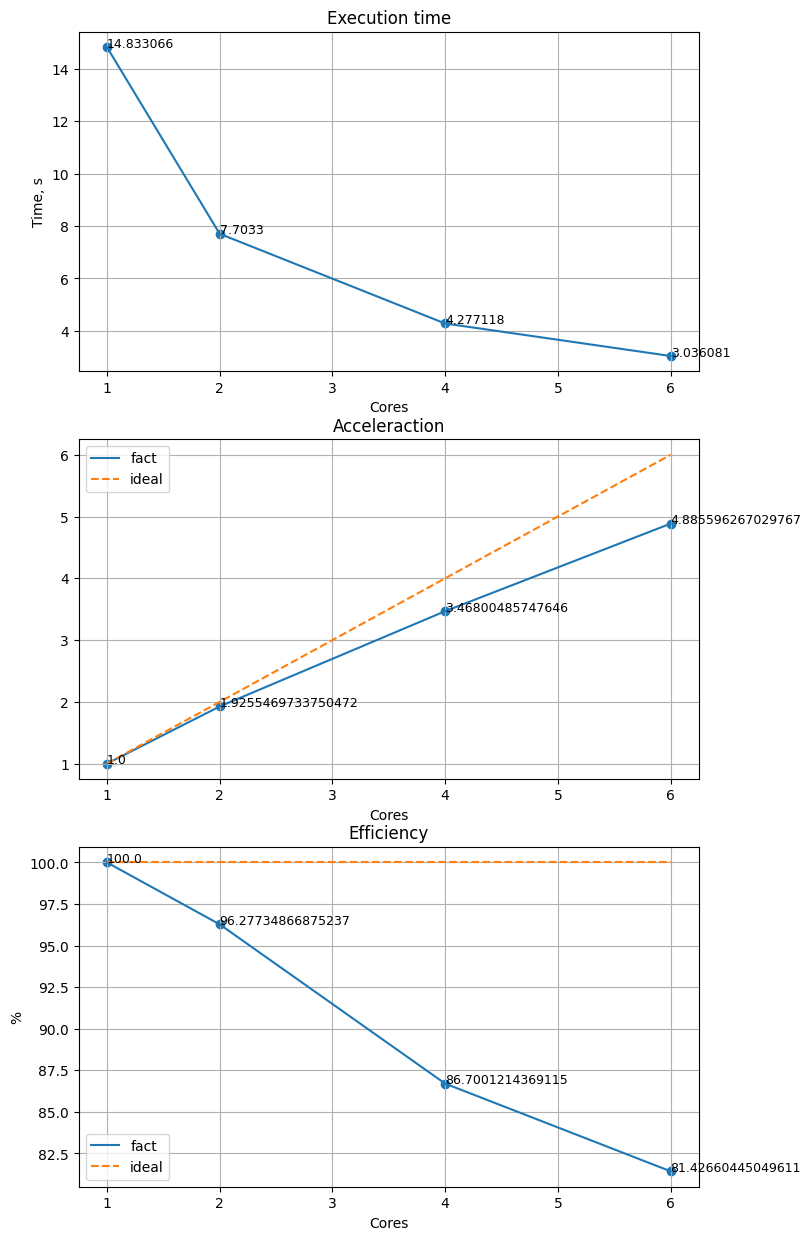

In [133]:
# Graphs
experiments = []
for n in list_cores:
    with open(f'out/task1_{n}.json') as f:
        experiments.append(json.load(f))

plt.figure(figsize=(8, 15))


exec_time_y = [x['exec_time'] for x in experiments]
plt.subplot(3, 1, 1)
plt.plot(list_cores, exec_time_y)
plt.title('Execution time')
plt.xlabel('Cores')
plt.ylabel('Time, s')
plt.grid(True)
plt.subplot(3, 1, 1)
plt.scatter(list_cores, exec_time_y)
for x_coord, y_coord, label in zip(list_cores, exec_time_y, exec_time_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  


acceleration_y = [experiments[0]['exec_time'] / x['exec_time'] for x in experiments]
plt.subplot(3, 1, 2)
plt.plot(list_cores, acceleration_y)
plt.plot([1,6], [1,6], linestyle='--')
plt.title('Acceleraction')
plt.xlabel('Cores')
plt.grid(True)
plt.legend(('fact','ideal'))
plt.subplot(3, 1, 2)
plt.scatter(list_cores, acceleration_y)
for x_coord, y_coord, label in zip(list_cores, acceleration_y, acceleration_y):
    plt.text(x_coord, y_coord, label, fontsize=9)


efficiency_y = [(experiments[0]['exec_time'] / x['exec_time']) / y * 100 for x, y in zip(experiments, list_cores)]
plt.subplot(3, 1, 3)
plt.title('Efficiency')
plt.xlabel('Cores')
plt.ylabel('%')
plt.grid(True)
plt.plot(list_cores, efficiency_y)
plt.plot([1,6], [100,100], linestyle='--')
plt.legend(('fact','ideal'))
plt.scatter(list_cores, efficiency_y)
for x_coord, y_coord, label in zip(list_cores, efficiency_y, efficiency_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  

plt.show()



#### Выводы
В целом, предсказуемые результаты - закон Амдала не выполняется
- С увеличением рабочих потоков возрастают затраты на коммуникацию, эффективность снижается
- Наилучший прирос заметен при переходе с 1 потока на 2

## Задание 3

In [117]:
# Compile
matrix_sizes = (200, 2000)
list_cores = (1, 4)
os.system('mpicc -o exe/task3.exe src/task3.c -lm')

0

In [ ]:
# Experiments
for core in list_cores:
    for matrix in matrix_sizes:
        os.system(f'mpiexec -n {core} exe/task3.exe {matrix}')

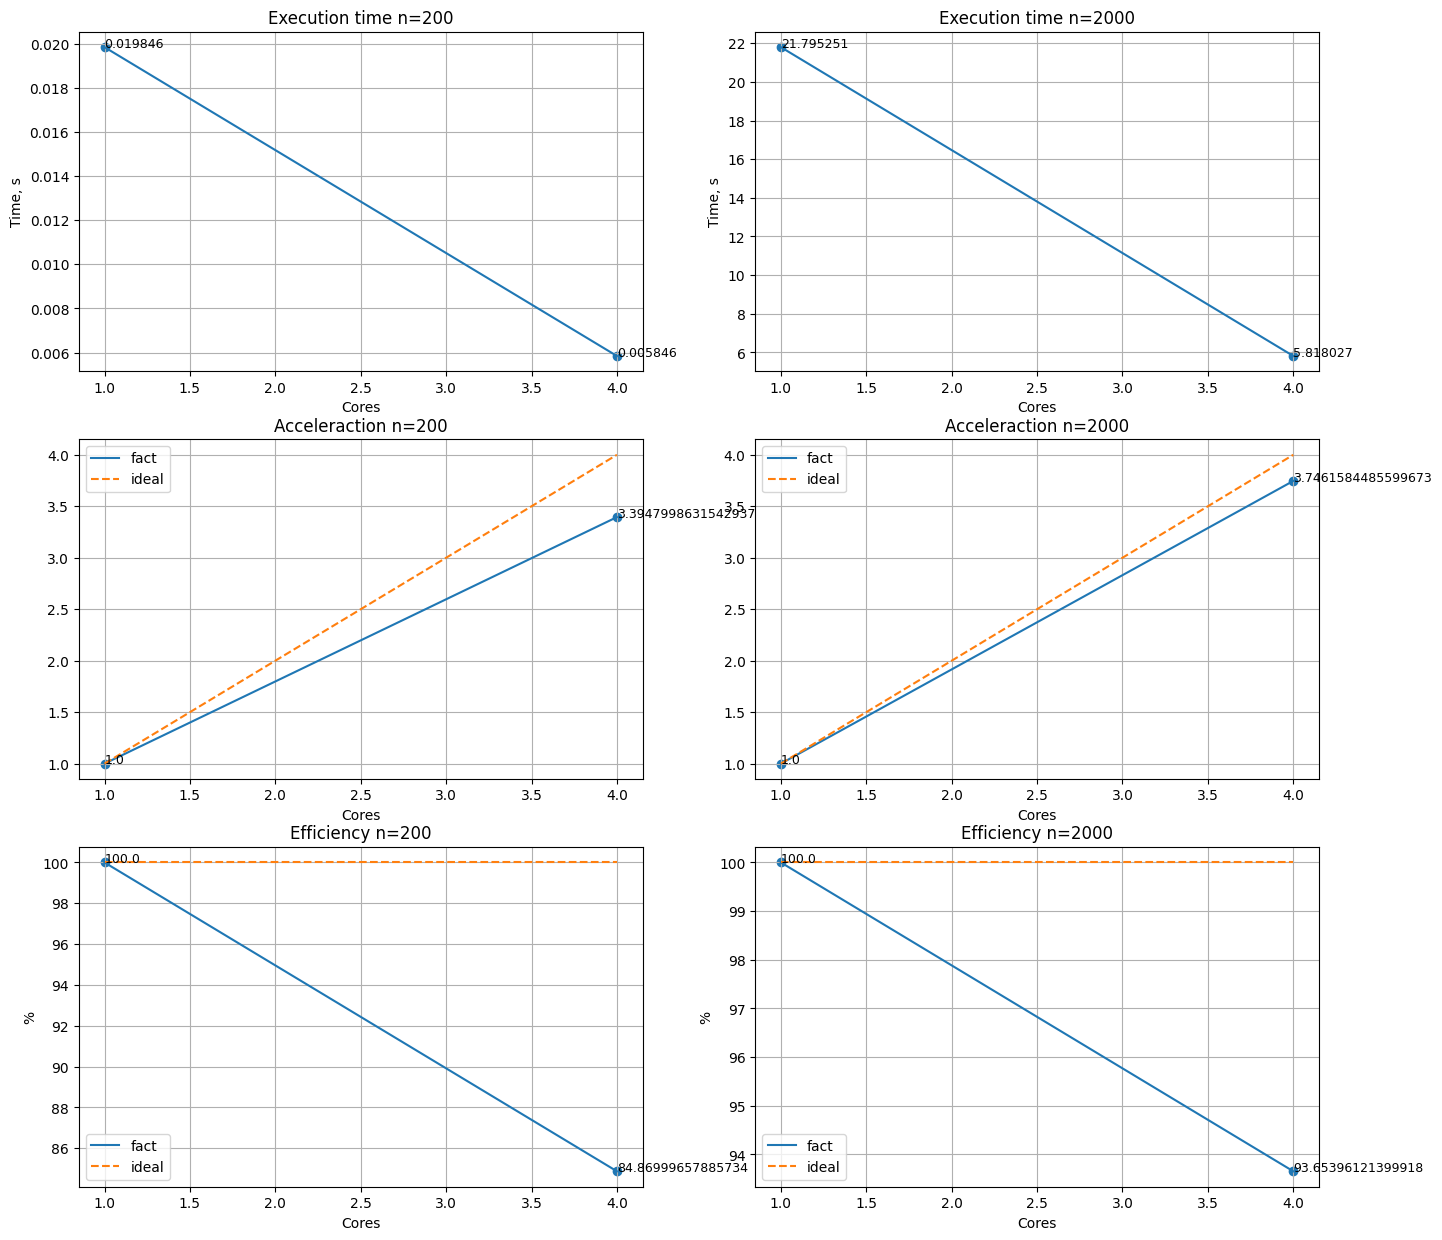

In [130]:
# Graphs
experiments = {}
for m in matrix_sizes:
    lst = []
    for n in list_cores:
        with open(f'out/task3_{n}_{m}.json') as f:
            lst.append(json.load(f))
    experiments[m] = lst

experiments

plt.figure(figsize=(16, 15))

# n=200
exec_time_y = [x['exec_time'] for x in experiments[200]]
plt.subplot(3, 2, 1)
plt.plot(list_cores, exec_time_y)
plt.title('Execution time n=200')
plt.xlabel('Cores')
plt.ylabel('Time, s')
plt.grid(True)
plt.scatter(list_cores, exec_time_y)
for x_coord, y_coord, label in zip(list_cores, exec_time_y, exec_time_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  


acceleration_y = [experiments[200][0]['exec_time'] / x['exec_time'] for x in experiments[200]]
plt.subplot(3, 2, 3)
plt.plot(list_cores, acceleration_y)
plt.plot([1,4], [1,4], linestyle='--')
plt.title('Acceleraction n=200')
plt.xlabel('Cores')
plt.grid(True)
plt.legend(('fact','ideal'))
plt.scatter(list_cores, acceleration_y)
for x_coord, y_coord, label in zip(list_cores, acceleration_y, acceleration_y):
    plt.text(x_coord, y_coord, label, fontsize=9)


efficiency_y = [(experiments[200][0]['exec_time'] / x['exec_time']) / y * 100 for x, y in zip(experiments[200], list_cores)]
plt.subplot(3, 2, 5)
plt.title('Efficiency n=200')
plt.xlabel('Cores')
plt.ylabel('%')
plt.grid(True)
plt.plot(list_cores, efficiency_y)
plt.plot([1,4], [100,100], linestyle='--')
plt.legend(('fact','ideal'))
plt.scatter(list_cores, efficiency_y)
for x_coord, y_coord, label in zip(list_cores, efficiency_y, efficiency_y):
    plt.text(x_coord, y_coord, label, fontsize=9) 


# n=2000
exec_time_y = [x['exec_time'] for x in experiments[2000]]
plt.subplot(3, 2, 2)
plt.plot(list_cores, exec_time_y)
plt.title('Execution time n=2000')
plt.xlabel('Cores')
plt.ylabel('Time, s')
plt.grid(True)
plt.scatter(list_cores, exec_time_y)
for x_coord, y_coord, label in zip(list_cores, exec_time_y, exec_time_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  


acceleration_y = [experiments[2000][0]['exec_time'] / x['exec_time'] for x in experiments[2000]]
plt.subplot(3, 2, 4)
plt.plot(list_cores, acceleration_y)
plt.plot([1,4], [1,4], linestyle='--')
plt.title('Acceleraction n=2000')
plt.xlabel('Cores')
plt.grid(True)
plt.legend(('fact','ideal'))
plt.scatter(list_cores, acceleration_y)
for x_coord, y_coord, label in zip(list_cores, acceleration_y, acceleration_y):
    plt.text(x_coord, y_coord, label, fontsize=9)


efficiency_y = [(experiments[2000][0]['exec_time'] / x['exec_time']) / y * 100 for x, y in zip(experiments[2000], list_cores)]
plt.subplot(3, 2, 6)
plt.title('Efficiency n=2000')
plt.xlabel('Cores')
plt.ylabel('%')
plt.grid(True)
plt.plot(list_cores, efficiency_y)
plt.plot([1,4], [100,100], linestyle='--')
plt.legend(('fact','ideal'))
plt.scatter(list_cores, efficiency_y)
for x_coord, y_coord, label in zip(list_cores, efficiency_y, efficiency_y):
    plt.text(x_coord, y_coord, label, fontsize=9)  

plt.show()

#### Выводы
Результаты похожи на Задание 1, но с увеличением размерности входных данных эффективность возрастает из-за большего количества выполненной работы относительно константного количества пересылок данных между потоками